Sampling

In [50]:
import numpy as np
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

샘플 수: 1000
샘플 평균: 70.19
샘플 표준편차: 9.79


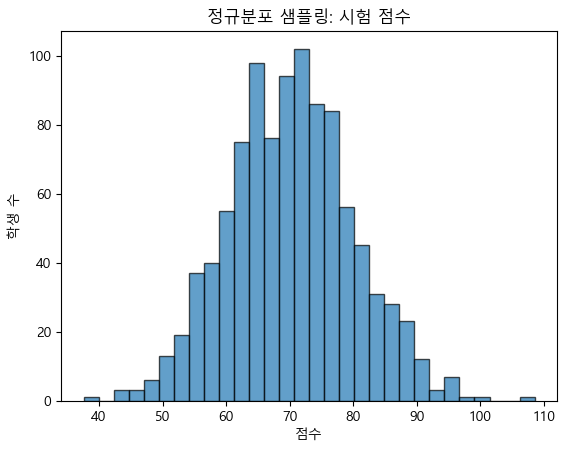

In [4]:
# 정규분포 : 평균70, 표준편차 10, 학생 1000명의 시험 점수 데이터셋

np.random.seed(42)

scores = np.random.normal(loc=70, scale=10, size=1000)

print("샘플 수:", len(scores))
print("샘플 평균:", round(np.mean(scores), 2))
print("샘플 표준편차:", round(np.std(scores),2))

# 시각화(히스토그램)
plt.hist(scores, bins=30, edgecolor="black", alpha=0.7)
plt.title("정규분포 샘플링: 시험 점수")
plt.xlabel("점수")
plt.ylabel("학생 수")
plt.show()

샘플 수: 1000
샘플 평균: 8.91
샘플 표준편차: 2.52


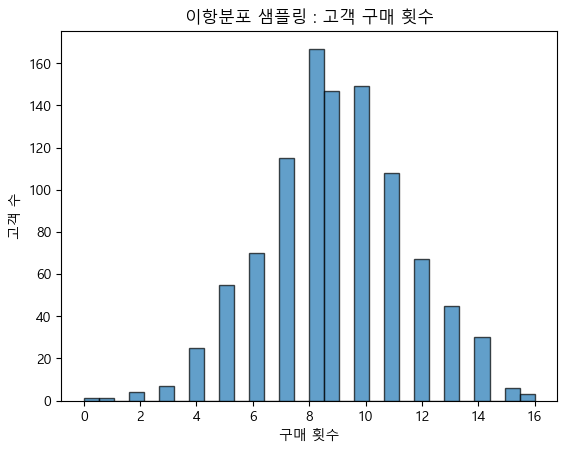

In [6]:
# 이항분포 : 고객 1명이 한 달 동안 구매할 확률 0.3일때
#           고객 1000명의 30일동안 구매 횟수 시뮬레이션

purchases = np.random.binomial(n=30, p=0.3, size=1000)

print("샘플 수:", len(purchases))
print("샘플 평균:", round(np.mean(purchases), 2))
print("샘플 표준편차:", round(np.std(purchases), 2))

plt.hist(purchases, bins=30, edgecolor="black", alpha=0.7)
plt.title("이항분포 샘플링 : 고객 구매 횟수")
plt.xlabel("구매 횟수")
plt.ylabel("고객 수")
plt.show()

평균, 분산, 성공확률 변화에 따른 그래프 차이

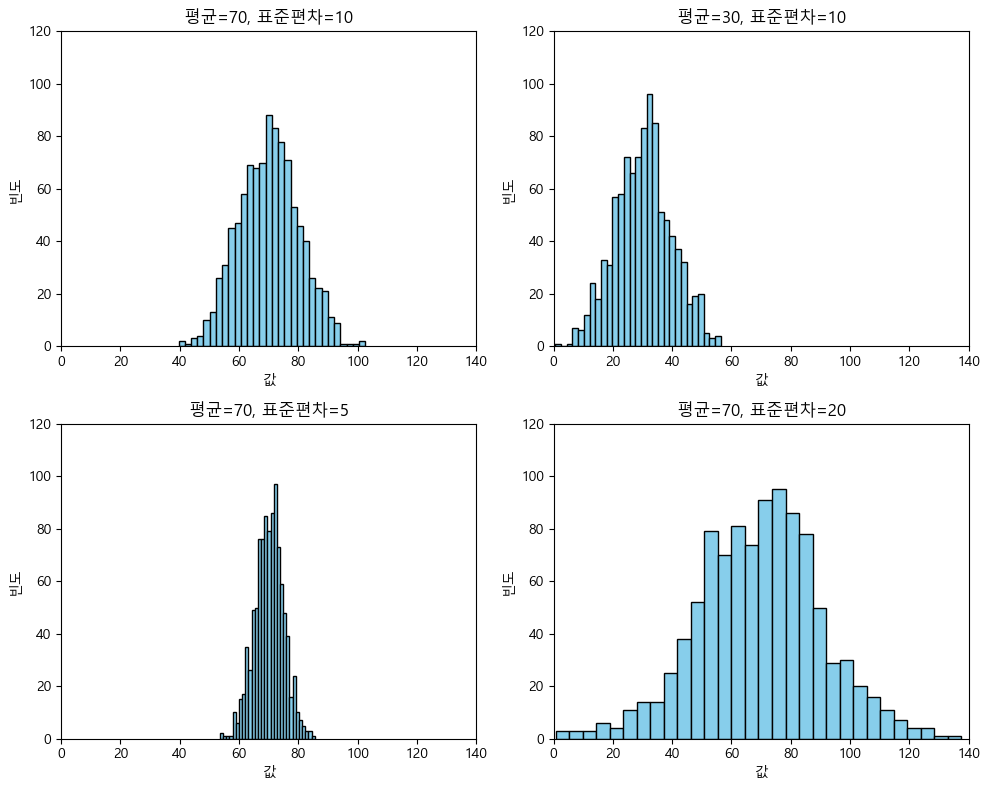

In [27]:
# 정규분포 -> 평균,분산 변화

sample_size = 1000

cases = [
  {"mu": 70, "sigma": 10, "label": "평균=70, 표준편차=10"},
  {"mu": 30, "sigma": 10, "label": "평균=30, 표준편차=10"},
  {"mu": 70, "sigma": 5, "label": "평균=70, 표준편차=5"},
  {"mu": 70, "sigma": 20, "label": "평균=70, 표준편차=20"},
]

fig, axes = plt.subplots(2, 2, figsize=(10, 8))

for ax, case in zip(axes.flatten(), cases):
  data = np.random.normal(loc=case["mu"], scale=case["sigma"], size=sample_size)

  ax.set_xlim(0, 140)
  ax.set_ylim(0, 120)

  ax.hist(data, bins=30, color="skyblue", edgecolor="black")
  ax.set_title(case["label"])
  ax.set_xlabel("값")
  ax.set_ylabel("빈도")

plt.tight_layout() # 레이아웃 자동 조정
plt.show()

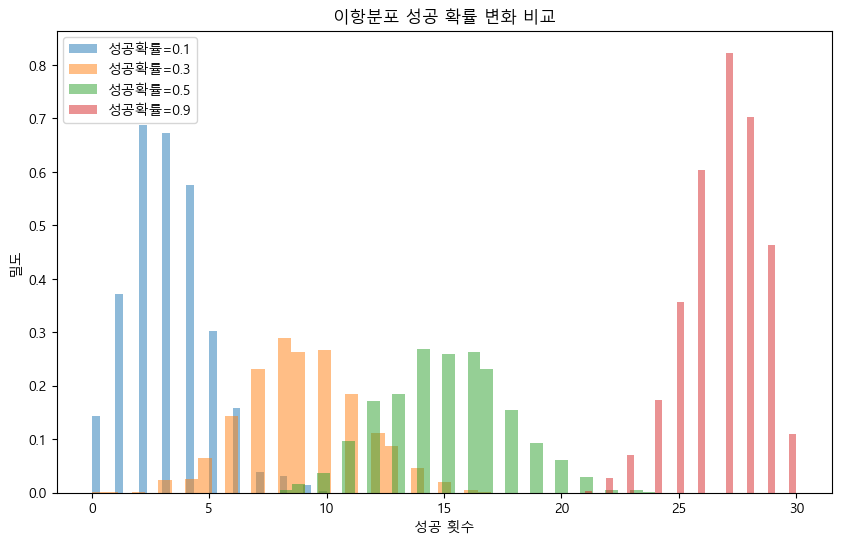

In [29]:
# 이항분포 -> 성공확률 p 변화

n = 30 # 시행횟수(30일)
sample_size = 1000

cases = [
  {"p": 0.1, "label": "성공확률=0.1"},
  {"p": 0.3, "label": "성공확률=0.3"},
  {"p": 0.5, "label": "성공확률=0.5"},
  {"p": 0.9, "label": "성공확률=0.9"}
]

plt.figure(figsize=(10, 6))

for case in cases:
  data = np.random.binomial(n=n, p=case["p"], size=sample_size)
  plt.hist(data, bins=30, density=True, alpha=0.5, label=case["label"])

plt.title("이항분포 성공 확률 변화 비교")
plt.xlabel("성공 횟수")
plt.ylabel("밀도")
plt.legend()
plt.show()

통계량 계산 (샘플vs이론 비교) => LLN

In [32]:
# 정규분포
mu, sigma, n = 70, 10, 1000
scores = np.random.normal(mu, sigma, n)

# 이론값
print("이론 평균 =", mu)
print("이론 표준편차 =", sigma)
print("이론 분산 =", sigma**2)

# 샘플 통계량
print()
print("샘플 평균 =", round(np.mean(scores), 2))
print("샘플 표준편차 =", round(np.std(scores), 2))
print("샘플 분산 =", round(np.var(scores), 2))

이론 평균 = 70
이론 표준편차 = 10
이론 분산 = 100

샘플 평균 = 69.62
샘플 표준편차 = 10.07
샘플 분산 = 101.32


In [35]:
# 이항분포
n, p, size = 30, 0.3, 1000
purchases = np.random.binomial(n, p, size)

"""
확률변수 X의,
- 평균(기댓값) E[X] = 각 x에 대해, x*P(X=x)의 합
- 분산 Var[X] = E[(X-mu)제곱] : 각 x에 대해, (평균과의 차이 제곱 * 그때의 확률)의 합

베르누이 분포 X ~> 이항분포
- mu = E[X] = E[X=1] + E[X=0] = 1*p + 0*(1-p) = p
- Var[X] = Var[X=1] + Var[X=0]
         = (1-p)제곱*p + (0-p)제곱*(1-p)
         = p(1-p)*(1-p + p)
         = p(1-p)
** p=0.5일때 분산 최대

이항분포는 베르누이의 합(베르누이를 n번 시행)
- E[X] = n*p
- Var[X] = n*p(1-p)

"""

# 이론값
theory_mean = n*p
theory_var = n*p*(1-p)
theory_std = np.sqrt(theory_var)

print("이론 평균 =", theory_mean)
print("이론 분산 =", theory_var)
print("이론 표준편차 =", round(theory_std, 2))
print()

# 샘플 통계량
print("샘플 평균 =", round(np.mean(purchases), 2))
print("샘플 분산 =", round(np.var(purchases), 2))
print("샘플 표준편차 =", round(np.std(purchases), 2))

이론 평균 = 9.0
이론 분산 = 6.3
이론 표준편차 = 2.51

샘플 평균 = 8.86
샘플 분산 = 6.28
샘플 표준편차 = 2.51


시각화 (Matplotlib/Seaborn)
- 히스토그램 : 샘플 데이터 분포 모양
- 확률밀도함수(PDF) (scripy.stats)
- 샘플 수에 따른 분포 차이

** Seaborn
- matplotblib 기반 데이터 시각화 라이브러리
- distplot, boxplot, heatmap 등 지원

** SciPy
- 과학 연산용 라이브러리
- scipy 안 stats 모듈이 통계 기능 담당
- 확률분포, 통계 검정, 샘플링, 확률밀도함수(PDF), 누적분포함수(CDF) 등 제공

** 확률밀도함수 vs 확률질량함수
- 확률밀도함수(PDF) : 연속적(continuous)
- 확률질량함수(PMF) : 이산적(discrete)

In [38]:
from scipy.stats import norm, binom

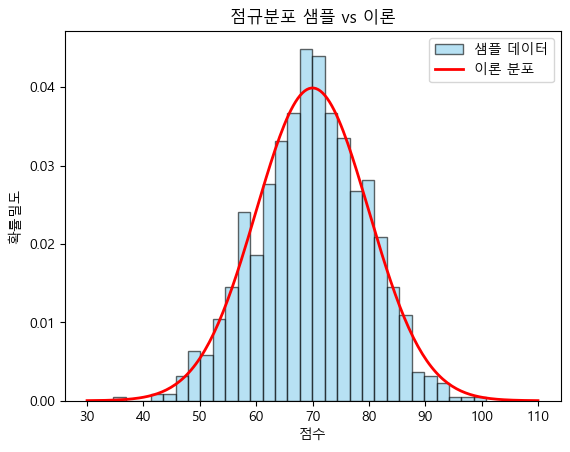

In [37]:
# 정규분포 파라미터
mu, sigma, n = 70, 10, 1000

# 샘플링
scores = np.random.normal(mu, sigma, n)

# 히스토그램
plt.hist(scores, bins=30, density=True, alpha=0.6, color="skyblue",
          edgecolor="black", label="샘플 데이터")

# 이론 정규분포 곡선
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 200)
pdf = norm.pdf(x, loc=mu, scale=sigma)
plt.plot(x, pdf, "r-", lw=2, label="이론 분포")

plt.title("점규분포 샘플 vs 이론")
plt.xlabel("점수")
plt.ylabel("확률밀도")
plt.legend()
plt.show()

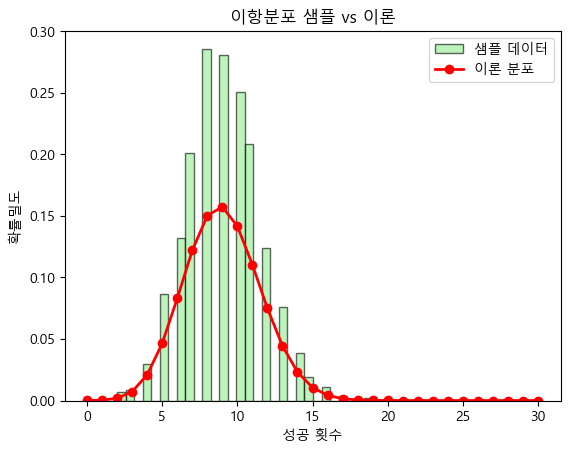

In [41]:
# 이항분포 파라미터
n, p, size = 30, 0.3, 1000

# 샘플링
purchases = np.random.binomial(n, p, size)

# 히스토그램
plt.hist(purchases, bins=30, density=True, alpha=0.6, color="lightgreen",
          edgecolor="black", label="샘플 데이터")

# 이론 이항분포 PMF(확률질량함수)
x = np.arange(0, n+1)
pmf = binom.pmf(x, n, p)
plt.plot(x, pmf, "ro-", lw=2, label="이론 분포")

plt.title("이항분포 샘플 vs 이론")
plt.xlabel("성공 횟수")
plt.ylabel("확률밀도")
plt.legend()
plt.show()

Seaborn Heatmap
- EDA 단계 : feature 간 상관관계 파악
- 분류 모델 성능 평가 : 정확도뿐만 아니라 오탐/미탐까지 확인 (혼동행렬)

  ** 오탐(False Positive) : 오류를 정상으로 예측 / 미탐(False Negative) : 정상을 오류로 예측

- 시계열/범주 조합 데이터 : 시간x요일, 매장x제품군 등 2차원 조합 데이터에서 어느 구간에 값이 몰리는지 패턴 파악 (pivot 후 heatmap)
- feature가 많은 고차원 데이터 시각화 : PCA, 클러스터링 후 패턴 확인 (.clustermap)

  ** PCA (주성분 분석) : 데이터를 잘 설명하는 새로운 좌표축을 만들어 변수(특징) 개수를 줄임 (차원 축소)

- 분포 비교(2D Density) : 두 연속형 변수의 결합 분포를 비교하여 outlier, cluster 확인 (.kdeplot)

In [42]:
import pandas as pd
import seaborn as sns

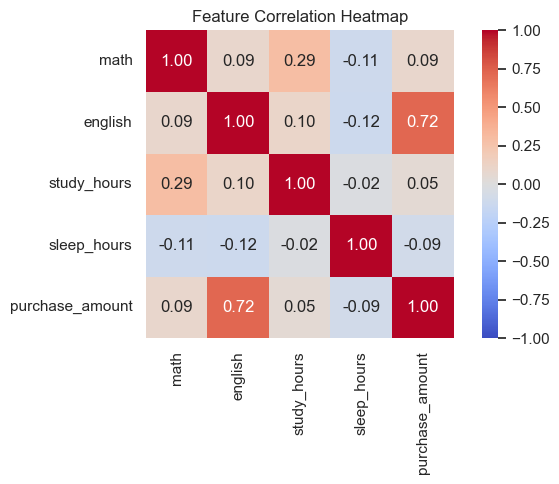

In [ ]:
"""
1) 상관관계 히트맵 (Correlation Heatmap)
 : EDA 단계에서, 수치형 feature들 사이의 관계 파악
"""

# 스타일
sns.set_theme(style="whitegrid")

# 재현성
rng = np.random.default_rng(42)
n=500

# 가짜 데이터셋: 점수/공부시간/수면/결제금액 등
df = pd.DataFrame({
  "math": rng.normal(70, 10, n),
  "english": rng.normal(68, 12, n),

  # .clip(min, max) : min보다 작은 값은 min으로, max보다 큰 값으 max로 바꿈. None이면 제한X
  "study_hours": rng.normal(2.5, 0.8, n).clip(0, None),
  "sleep_hours": rng.normal(7.0, 1.0, n).clip(3, 12),
  "purchase_amount": rng.normal(30, 15, n).clip(0, None)
})

# 유도된 상관 : 공부↑ → 점수↑, 수면 극단적 → 점수↓ 같은 패턴 흉내
df["math"] += 3.0 * (df["study_hours"] - df["study_hours"].mean())
df["english"] += 2.0 * (df["study_hours"] - df["study_hours"].mean())

bad_sleep = (df["sleep_hours"] < 4) | (df["sleep_hours"] > 9)
df.loc[bad_sleep, "math"] -= 20
df.loc[bad_sleep, "english"] -= 20

df["purchase_amount"] += 1.2 * (df["english"] - df["english"].mean())

# 상관행렬
corr = df.corr(numeric_only=True)

plt.figure(figsize=(7, 5))
sns.heatmap(
  corr,
  annot=True, # 각 칸에 "숫자 표시" 여부
  fmt=".2f", # 숫자 표시 형식
  cmap="coolwarm", # 색상 팔레트
  vmin=-1, vmax=1, # 색상 "범위 고정" (상관계수이므로 -1~1)
  square=True # 칸을 정사각형으로 출력
)
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()

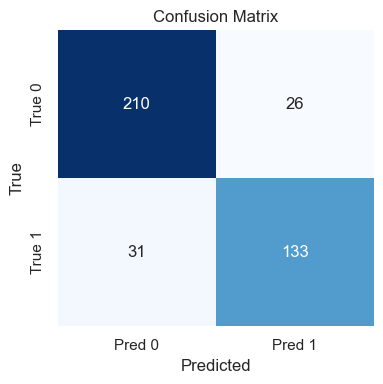

              precision    recall  f1-score   support

           0      0.871     0.890     0.881       236
           1      0.836     0.811     0.824       164

    accuracy                          0.858       400
   macro avg      0.854     0.850     0.852       400
weighted avg      0.857     0.858     0.857       400



In [ ]:
"""
2) 혼동행렬 히트맵 (Confusion Matrix Heatmap)
 : 분류 모델 성능 점검 -> 정답/예측 카운트를 행렬로 확인
"""
from sklearn.metrics import confusion_matrix, classification_report

rng = np.random.default_rng(0)
n = 400

# 이진 분류용 가상 데이터 (점수 기반 라벨 생성)
score = rng.normal(0, 1, n)
y_true = (score > 0.2).astype(int)

# 모델 예측 흉내 : 약간의 잡음 추가하여 완벽하지 않게
y_pred = (score + rng.normal(0, 0.5, n) > 0.2).astype(int)

cm = confusion_matrix(y_true, y_pred, labels=[0, 1])
# 실무) 클래스 불균형일때 normalize='true' 많이 사용

plt.figure(figsize=(4, 4))
sns.heatmap(
  cm,
  annot=True,
  fmt="d",
  cmap="Blues", # 색상 팔레트 : 파란 계열
  cbar=False, # 오른쪽 색상 막대(color bar) 표시
  xticklabels=["Pred 0", "Pred 1"], # x축 레이블 : 에측값 클래스
  yticklabels=["True 0", "True 1"] # y축 레이블 : 실제값 클래스
)
plt.title("Confusion Matrix")
plt.ylabel("True")
plt.xlabel("Predicted")
plt.tight_layout()
plt.show()

print(classification_report(y_true, y_pred, digits=3))

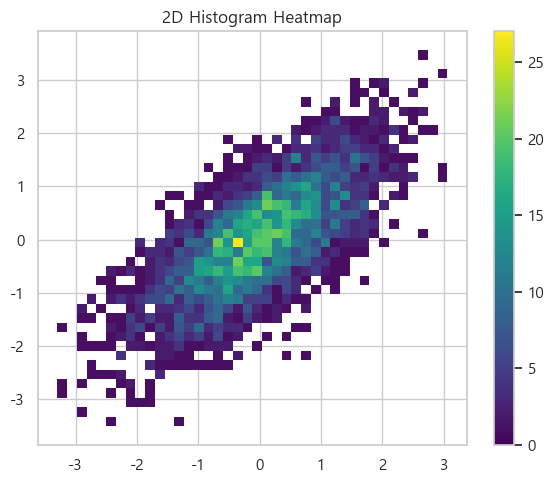

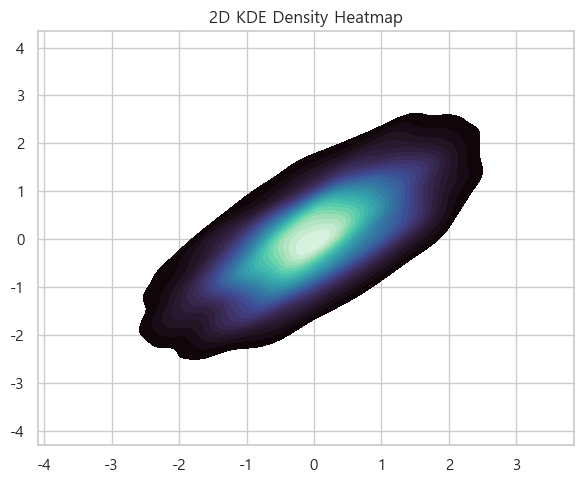

In [52]:
"""
3) 2D 밀도/분포 히트맵 (Bivariate Heatmap)
 : 두 연속형 변수의 결합 분포를 시각화 -> 군집/패턴 확인
   a) 2D 히스토그램 기반
   b) 커널밀도추정 KDE 히트맵 (부드러운 분포)
"""

rng = np.random.default_rng(123)
n = 3000

"""
이변량(bivariate): 변수 2개가 동시에 정규분포를 따름
단변량(univariate): 변수 1개 -> 우리가 흔히 보는 정규분포
"""
# 이변량 정규(상관 있는 데이터)
x = rng.normal(0, 1, n)
y = 0.7*x + rng.normal(0, 0.7, n) # x와 양의 상관

# a) 2D 히스토그램 기반
plt.figure(figsize=(6, 5))
sns.histplot(x=x, y=y, bins=40, cbar=True, cmap="viridis")
plt.title("2D Histogram Heatmap")
plt.tight_layout()
plt.show()

# b) 커널밀도추정 KDE 히트맵
plt.figure(figsize=(6,5))
sns.kdeplot(x=x, y=y, fill=True, thresh=0.05, levels=30, cmap="mako")
plt.title("2D KDE Density Heatmap")
plt.tight_layout()
plt.show()

Origin shape: (150, 4)
PCA shape: (150, 2)


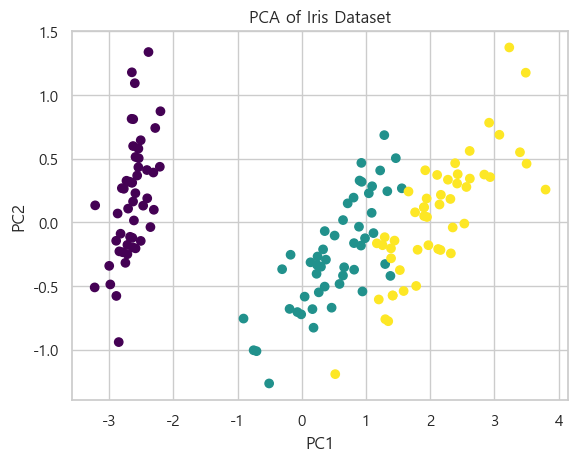

In [ ]:
"""
PCA(주성분분석): 데이터 분산이 가장 큰 방향으로 좌표축 재정의하는 차원 축소 기법
- 차원 축소, 노이즈 제거, 시각화, 계산 효율
- 선형 변환이라 비선형 패턴은 잘 못 잡음
"""

from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

# 데이터 (iris: 4차원)
iris = load_iris()
X = iris.data

# PCA (2차원으로 축소)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

print("Origin shape:", X.shape)
print("PCA shape:", X_pca.shape)

# 시각화
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=iris.target, cmap="viridis")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA of Iris Dataset")
plt.show()

** Iris 데이터셋
- Iris Flower Dataset (붓꽃 데이터셋)
- 3가지 붓꽃 품종을 측정한 데이터 : Setosa, Versicolor, Virginica
- 특징(피처) : 꽃받침 길이/너비, 꽃잎 길이/너비 => 4특징
- 샘플 수 150
=> 단순하지만 분류(Classification) 문제를 설명하기 좋은 예제 데이처셋